# Spain Market Deep Dive

This notebook focuses exclusively on the Spanish job market for Data & Tech roles.

**Objectives:**
1. **City Analysis:** Where are the jobs? (Madrid vs Barcelona vs Remote)
2. **Role Distribution:** Which roles are most in demand in Spain?
3. **Company Landscape:** Top hiring companies in Spain.
4. **Work Modality:** How remote-friendly is the Spanish market?
5. **Seniority:** What is the demand for Juniors vs Seniors in Spain?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_theme(style="whitegrid")
pd.set_option('display.max_colwidth', 100)

## 1. Load Data & Filter for Spain

In [2]:
df = pd.read_csv("../data/interim/all_jobs_merged.csv")
# Filter for Spain (assuming country_code 'es')
# Checking unique country codes first to be sure
print(df['country_code'].unique())
df_es = df[df['country_code'] == 'es'].copy()

df_es['created'] = pd.to_datetime(df_es['created'])
df_es['company'] = df_es['company'].fillna('Unknown')
df_es['description'] = df_es['description'].fillna('')

print(f"Total Jobs in Spain: {len(df_es)}")

['at' 'au' 'be' 'br' 'ca' 'ch' 'de' 'es' 'fr' 'gb' 'in' 'it' 'mx' 'nl'
 'nz' 'pl' 'sg' 'us' 'za']
Total Jobs in Spain: 406


## 2. City Analysis (Madrid vs Barcelona)

We extract city names from the location field.

=== RAW location counts (top 20) ===
location
España                                  117
Madrid, Comunidad de Madrid              96
Barcelona, Cataluña                      77
Madrid                                   47
Barcelona                                31
Málaga                                    6
Málaga, Andalucía                         4
Esplugues de Llobregat, Barcelona         3
Rubí, Barcelona                           3
Sant Adrià de Besòs, Barcelona            2
Vigo, Pontevedra                          2
Carballedo, Lugo                          2
Zaragoza                                  2
Huesca                                    2
Getafe, Madrid                            1
L'Hospitalet de Llobregat, Barcelona      1
Galicia, España                           1
Una, Cuenca                               1
Tarragona                                 1
Alcobendas, Madrid                        1
Name: count, dtype: int64

Total unique locations: 26
Jobs per city:
city


C:\Users\bnove\AppData\Local\Temp\ipykernel_9336\914908970.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.head(10).values, y=city_counts.head(10).index, palette='husl')


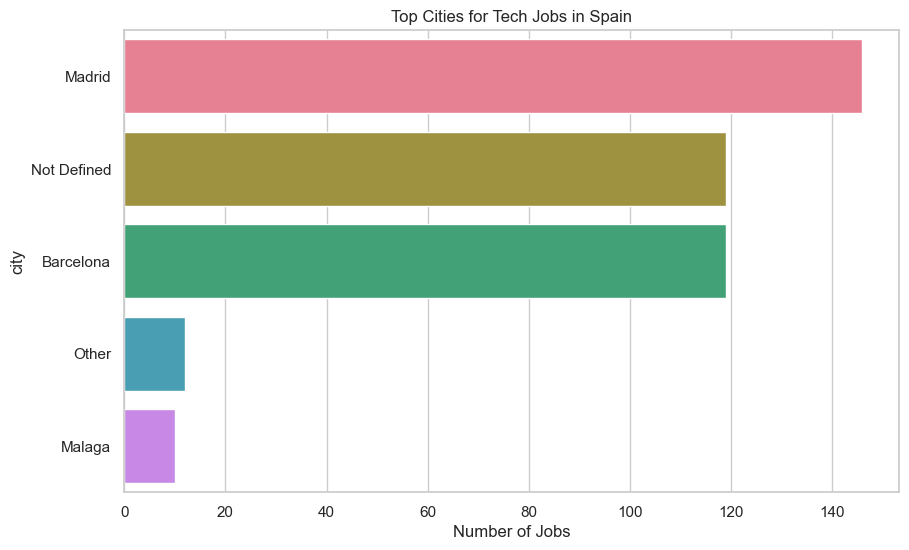

In [ ]:
print("=== RAW location counts (top 20) ===")
print(df_es['location'].value_counts().head(20))
print(f"\nTotal unique locations: {df_es['location'].nunique()}")

def clean_city(loc):
    loc = str(loc).lower()
    if 'madrid' in loc: return 'Madrid'
    if 'barcelona' in loc or 'tarragona' in loc: return 'Barcelona'
    if 'málaga' in loc or 'malaga' in loc: return 'Malaga'
    if 'españa' in loc: return 'Not Defined'
    if 'remote' in loc or 'remoto' in loc: return 'Remote (Location not spec.)'
    return 'Other'

df_es['city'] = df_es['location'].apply(clean_city)

print("Jobs per city:")
print(df_es['city'].value_counts())

plt.figure(figsize=(10, 6))
city_counts = df_es['city'].value_counts()
sns.barplot(x=city_counts.head(10).values, y=city_counts.head(10).index, palette='husl')
plt.title('Top Cities for Tech Jobs in Spain')
plt.xlabel('Number of Jobs')
plt.show()

## 3. Top Hiring Companies in Spain

C:\Users\bnove\AppData\Local\Temp\ipykernel_9336\510512663.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')


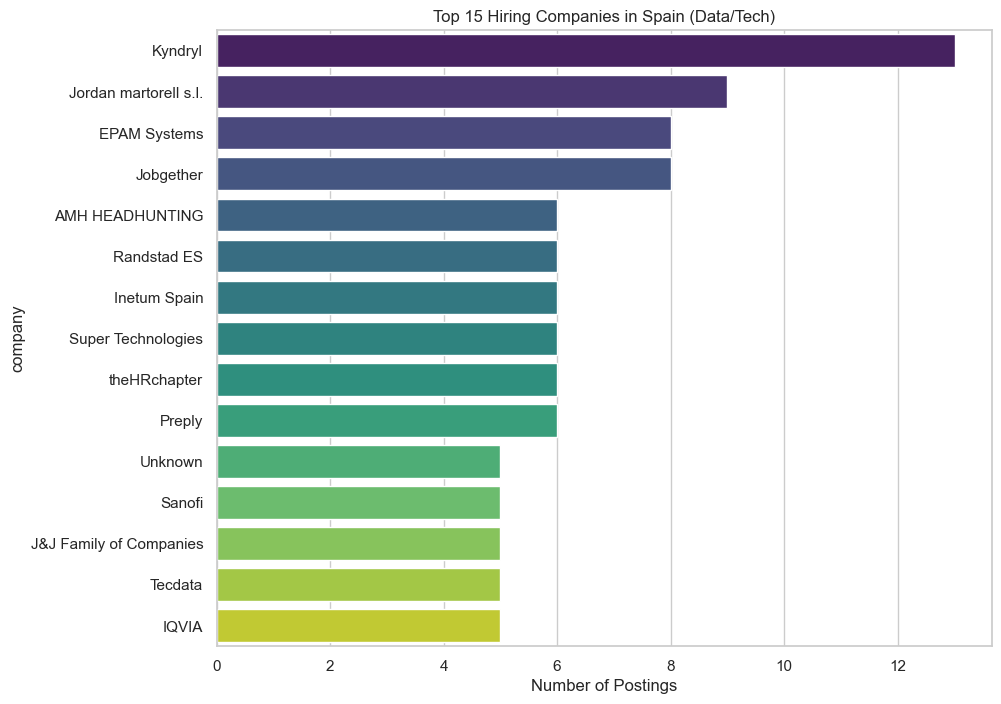

In [4]:
plt.figure(figsize=(10, 8))
top_companies = df_es['company'].value_counts().head(15)
sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')
plt.title('Top 15 Hiring Companies in Spain (Data/Tech)')
plt.xlabel('Number of Postings')
plt.show()

## 4. Role Distribution in Spain

C:\Users\bnove\AppData\Local\Temp\ipykernel_9336\903819140.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=role_counts.values, y=role_counts.index, palette='rocket')


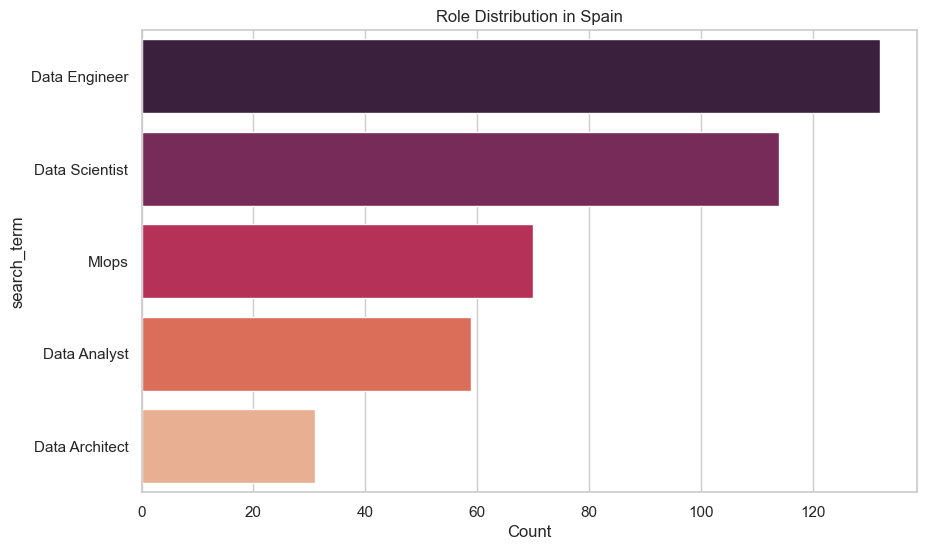

In [5]:
plt.figure(figsize=(10, 6))
role_counts = df_es['search_term'].value_counts()
sns.barplot(x=role_counts.values, y=role_counts.index, palette='rocket')
plt.title('Role Distribution in Spain')
plt.xlabel('Count')
plt.show()

## 6. Seniority in Spain

C:\Users\bnove\AppData\Local\Temp\ipykernel_9336\1964439509.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_es, y='seniority', order=order, palette='viridis')


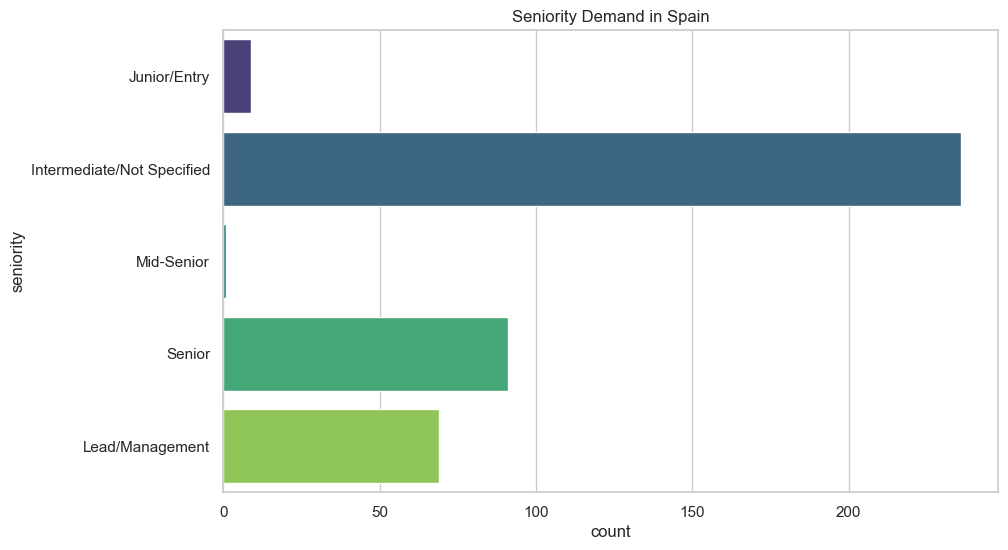

In [6]:
def extract_seniority(title):
    title = str(title).lower()
    if re.search(r'\b(lead|head|manager|director|principal|staff|chief)\b', title):
        return 'Lead/Management'
    if re.search(r'\b(senior|sr|expert|advanced)\b', title):
        return 'Senior'
    if re.search(r'\b(junior|jr|entry|intern|trainee|graduate|beca|prácticas)\b', title):
        return 'Junior/Entry'
    if re.search(r'\b(semi-senior|ssr|middle|mid)\b', title):
        return 'Mid-Senior'
    return 'Intermediate/Not Specified'

df_es['seniority'] = df_es['title'].apply(extract_seniority)

plt.figure(figsize=(10, 6))
order = ['Junior/Entry', 'Intermediate/Not Specified', 'Mid-Senior', 'Senior', 'Lead/Management']
sns.countplot(data=df_es, y='seniority', order=order, palette='viridis')
plt.title('Seniority Demand in Spain')
plt.show()

## 7. Key Skills in Demand (Spain)

What technologies are companies looking for in the Spanish market?

C:\Users\bnove\AppData\Local\Temp\ipykernel_9336\2524643403.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


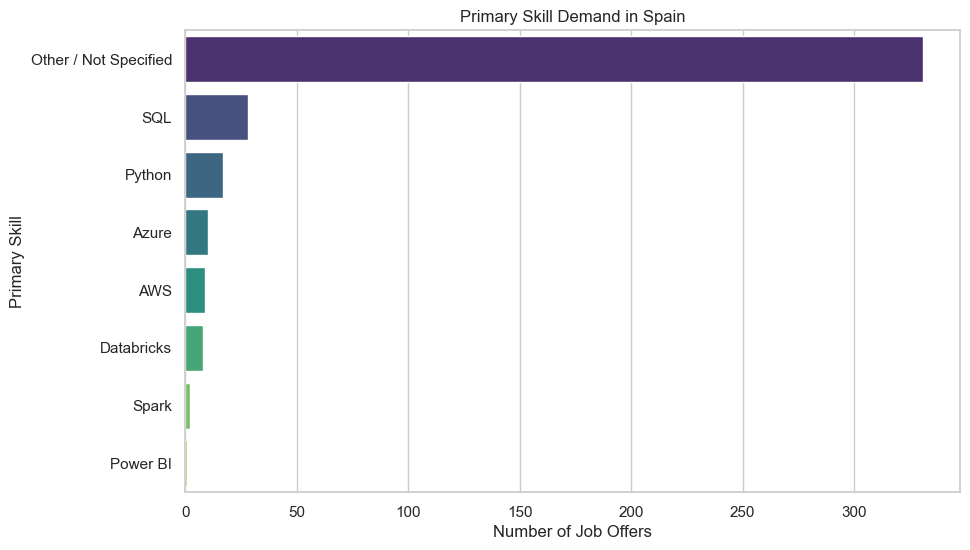

In [ ]:
def extract_skill(description):
    desc = str(description).lower()

    if re.search(r'\bsql\b', desc):
        return 'SQL'
    if re.search(r'\bpython\b', desc):
        return 'Python'
    if re.search(r'\bpower\s?bi\b', desc):
        return 'Power BI'
    if re.search(r'\baws\b|\bamazon web services\b', desc):
        return 'AWS'
    if re.search(r'\bazure\b', desc):
        return 'Azure'
    if re.search(r'\bgcp\b|\bgoogle cloud\b', desc):
        return 'GCP'
    if re.search(r'\btableau\b', desc):
        return 'Tableau'
    if re.search(r'\bdatabricks\b', desc):
        return 'Databricks'
    if re.search(r'\bspark\b', desc):
        return 'Spark'

    return 'Other / Not Specified'

df_es['primary_skill'] = df_es['description'].apply(extract_skill)

plt.figure(figsize=(10, 6))

order = (
    df_es['primary_skill']
    .value_counts()
    .index
)

sns.countplot(
    data=df_es,
    y='primary_skill',
    order=order,
    palette='viridis'
)

plt.title('Primary Skill Demand in Spain')
plt.xlabel('Number of Job Offers')
plt.ylabel('Primary Skill')
plt.show()

## 8. Seniority vs Modality Correlation

Are Senior roles more likely to be remote than Junior roles in Spain?

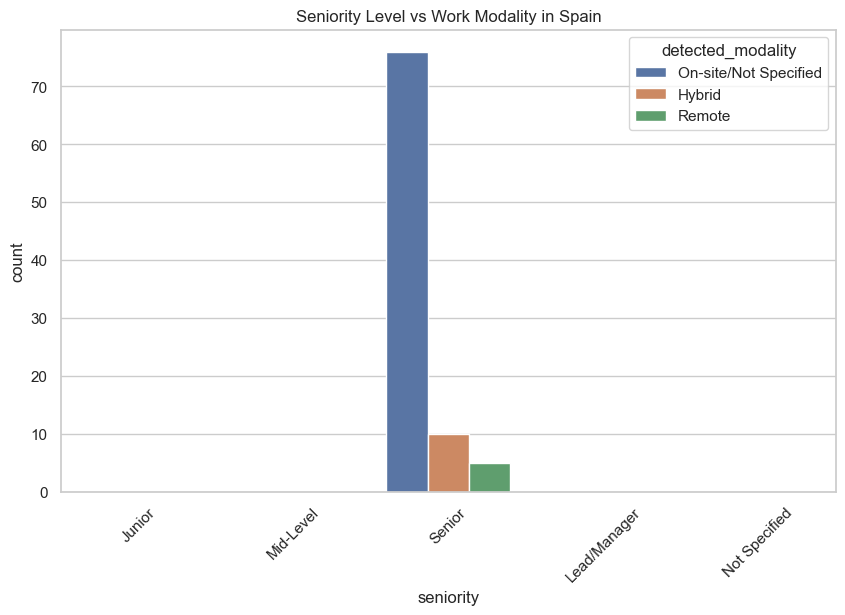

In [7]:
# Simple keyword detection for modality
def detect_modality(row):
    text = (str(row['location']) + " " + str(row['description'])).lower()
    if 'remote' in text or 'teletrabajo' in text or 'remoto' in text: return 'Remote'
    if 'hybrid' in text or 'hibrido' in text: return 'Hybrid'
    return 'On-site/Not Specified'

df_es['detected_modality'] = df_es.apply(detect_modality, axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(data=df_es, x='seniority', hue='detected_modality', 
              order=['Junior', 'Mid-Level', 'Senior', 'Lead/Manager', 'Not Specified'])
plt.title('Seniority Level vs Work Modality in Spain')
plt.xticks(rotation=45)
plt.show()